In [338]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.ticker import MultipleLocator

from scipy.stats import linregress

from IPython.display import display, Math, Latex

## Обработка зависимости силы тока, температуры и времени

In [339]:
data_tempr = pd.read_excel('data.ods', sheet_name = 'Tempr')
data_tok = pd.read_excel('data.ods', sheet_name = 'Tok')

In [340]:
time = data_tempr['t (c)']
tempr = data_tempr['T (Цел)']

for i in range(0, len(tempr)):
    tempr[i] = float(tempr[i].replace(',', '.')) + 273   
    
tok = data_tok['I (mkA)']

tempr = tempr.to_numpy().astype(float)
tok = tok.to_numpy().astype(float)

error_tempr = (tempr * 0.002).mean() + 1

tempr, tok, time

/var/folders/cx/2dk5zlq93275n3kj7b8w85fc0000gn/T/ipykernel_1940/2034836479.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempr[i] = float(tempr[i].replace(',', '.')) + 273


(array([371.3, 371.3, 371.3, 371.3, 371.3, 371.2, 371.2, 371.2, 371. ,
        371. , 371. , 370.7, 370.7, 370.7, 370.4, 370.4, 370.4, 370.1,
        370.1, 370.1, 370.1, 369.9, 369.9, 369.9, 369.6, 369.6, 369.6,
        369.3, 369.3, 369.3, 368.9, 368.9, 368.9, 368.6, 368.6, 368.6,
        368.6, 368.2, 368.2, 368.2, 367.8, 367.8, 367.8, 367.3, 367.3,
        367.3, 366.9, 366.9, 366.9, 366.4, 366.4, 366.4, 366.4, 365.9,
        365.9, 365.9, 365.4, 365.4, 365.4, 364.9, 364.9, 364.9, 364.5,
        364.5, 364.5, 364.1, 364.1, 364.1, 364.1, 363.6, 363.6, 363.6,
        363.1, 363.1, 363.1, 362.6, 362.6, 362.6, 362.1, 362.1, 362.1,
        361.6, 361.6, 361.6, 361.6, 361.1, 361.1, 361.1, 360.6, 360.6,
        360.6, 360.1, 360.1, 360.1, 359.7, 359.7, 359.7, 359.2, 359.2,
        359.2, 359.2, 358.7, 358.7, 358.7, 358.3, 358.3, 358.3, 357.8,
        357.8, 357.8, 357.3, 357.3, 357.3, 356.9, 356.9, 356.9, 356.9,
        356.4, 356.4, 356.4, 356. , 356. , 356. , 355.5, 355.5, 355.5,
      

In [341]:
print(tempr.size, tok.size, time.size)

486 486 486


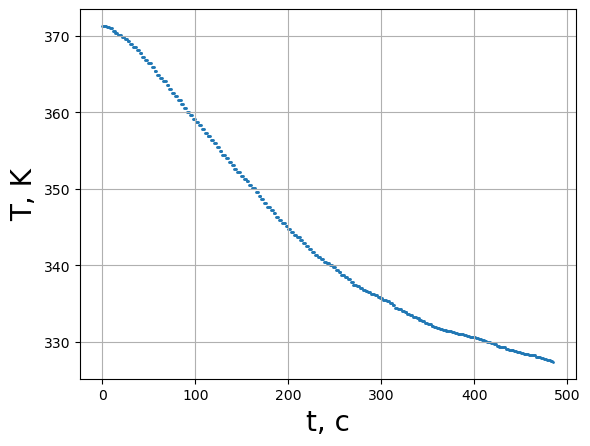

In [342]:
plt.scatter(time, tempr, s = 1)
plt.xlabel('t, c', fontsize = 20)
plt.ylabel('T, K', fontsize = 20)
plt.grid(True)

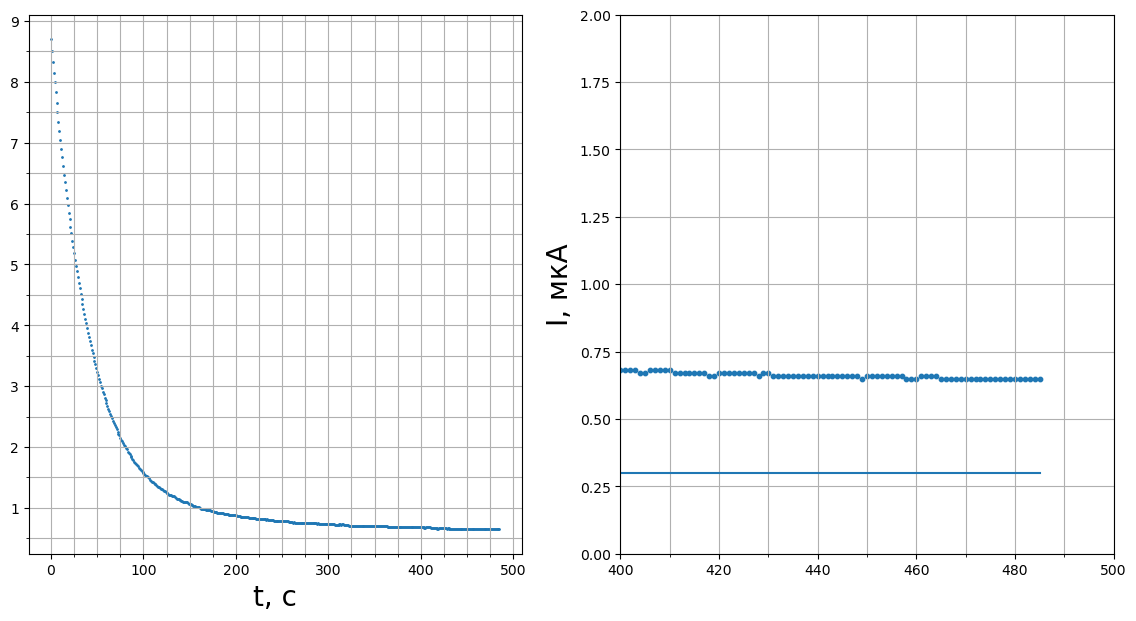

In [343]:

fig, (axs1, axs2) = plt.subplots(1, 2, figsize = (14, 7))

axs1.scatter(time, tok, s=1)

axs1.xaxis.set_minor_locator(MultipleLocator(25))
axs1.yaxis.set_minor_locator(MultipleLocator(0.5))

axs1.grid(True, which = 'major')
axs1.grid(True, which = 'minor')

axs1.set_xlabel('t, c', fontsize = 20)
axs2.set_ylabel('I, мкA', fontsize = 20)

axs2.scatter(time, tok, s=10)
axs2.plot(time, [30 * 10**(-2) for _ in range(time.size)])

axs2.xaxis.set_minor_locator(MultipleLocator(10))
axs2.set_ylim(0, 2)
axs2.set_xlim(400, 500)
axs2.grid(True, which = 'major')
axs2.grid(True, which = 'minor')

plt.grid(True)

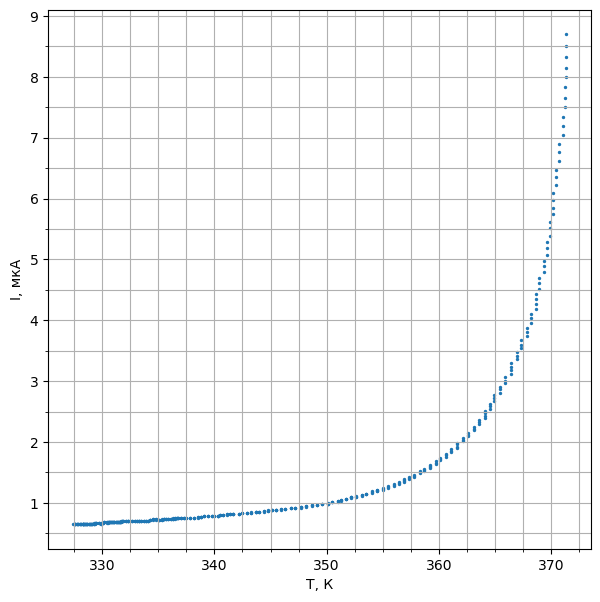

In [344]:
fig, axs = plt.subplots(figsize = (7, 7))

axs.scatter(tempr, tok, s = 2)

axs.xaxis.set_minor_locator(MultipleLocator(2.5))
axs.yaxis.set_minor_locator(MultipleLocator(0.5))

axs.set_xlabel('T, К')
axs.set_ylabel('I, мкА')

axs.grid(True, which = 'major')
axs.grid(True, which = 'minor')

plt.show()

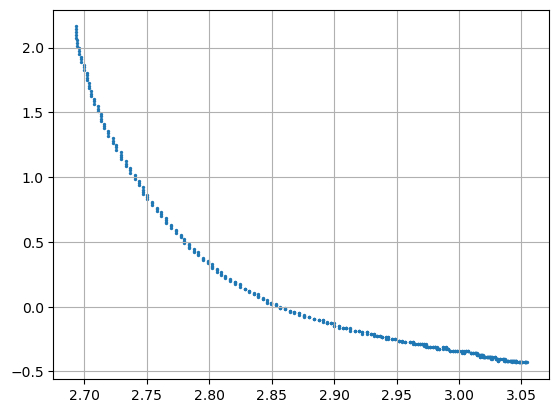

In [345]:
x = 1000/tempr
y = np.log(tok)
plt.scatter(x, y, s = 2)
plt.grid(True)


In [346]:
deleted_first = 215
deleted_last = len(x)

slope = -1.7817972997143618 + 0.011100642072971793
intercept = 5.002199350564676 + 0.033292795572456194


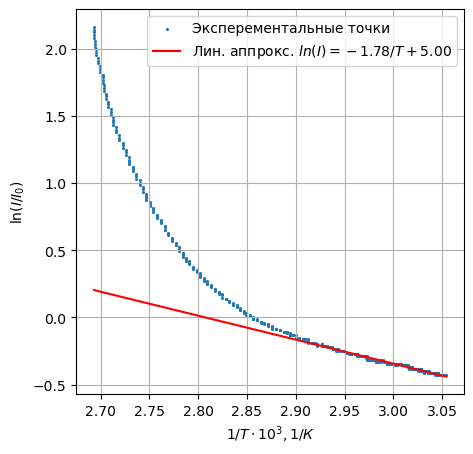

In [358]:
result = linregress(x[deleted_first:deleted_last].astype(float), y[deleted_first:deleted_last])

slope = result.slope
intercept = result.intercept
slope_err = result.stderr
intercept_err = result.intercept_stderr

fig, axs = plt.subplots(1,1, figsize = (5, 5))

x1 = np.linspace(min(x), max(x), 1000)
y1 = slope * x1 + intercept
axs.scatter(x, y, s = 1.5, label="Эксперементальные точки")
axs.plot(x1, y1, c = 'r', label="Лин. аппрокc. $ln(I) = %.2f /T + %.2f$" % (slope, intercept))
axs.set_ylabel('$\ln(I/I_0)$')
axs.set_xlabel('$1/T \cdot 10^3, 1/К$')


plt.grid(True)

print(f'slope = {slope} + {slope_err}')
print(f'intercept = {intercept} + {intercept_err}')

plt.legend()
plt.show()

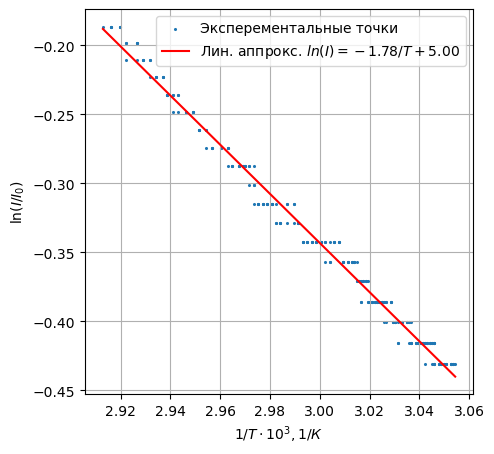

In [359]:
fig, axs = plt.subplots(1,1, figsize = (5, 5))

x1 = np.linspace(min(x[deleted_first:]), max(x[deleted_first:]), 10000)
y1 = slope * x1 + intercept
axs.scatter(x[deleted_first:deleted_last], y[deleted_first:deleted_last], s = 1.5, label="Эксперементальные точки")
axs.plot(x1, y1, c = 'r', label="Лин. аппрокс. $ln(I) = %.2f /T + %.2f$" % (slope, intercept))
axs.set_ylabel('$\ln(I/I_0)$')
axs.set_xlabel('$1/T \cdot 10^3, 1/К$')


plt.grid(True)
plt.legend()
plt.show()

## Теплота адсорбции

In [349]:
k = 1.38 * 10 ** (-23)
e = 1.6 * 10 ** (-19)
R = 8.31
Q = -slope * 2 * k * 1000

Q_error = Q * error_tempr / tempr

Q_ev = Q/e*1000
Q_j = -slope * 2 * R
Q_j = Q_j

Q_ev_error = Q_ev * slope_err / slope
Q_j_error = Q_j * slope_err / slope

print(f'Q = {Q_ev} +- {Q_ev_error}')
print(f'Q = {Q_j} + {Q_j_error}')



Q = 307.36003420072734 +- -1.9148607575876337
Q = 29.613471121252697 + -0.18449267125279123


## Рабочие температура, время и давление

In [350]:
T0 = 45.2 + 273
I0 = 30 * 10**(-2)

C = 87 # Торр / А
C_error = 17

P0 = C * 101325/760 * I0 # мкПа

P0_torr = C * I0 # мкТорр

print(P0_torr)


26.099999999999998


## Функция производной

In [351]:
def get_derivative(x, y, number_of_dots = 10):
    derivative = np.array([None for i in range(x.size // number_of_dots + 1)])
    for i in range(0, x.size // number_of_dots + 1):
        derivative[i], *_ = linregress(
            tempr[i*number_of_dots:(i+1)*number_of_dots], 
            tok[i*number_of_dots:(i+1)*number_of_dots]
        )
    return derivative

## Температура резкого увеличения тока

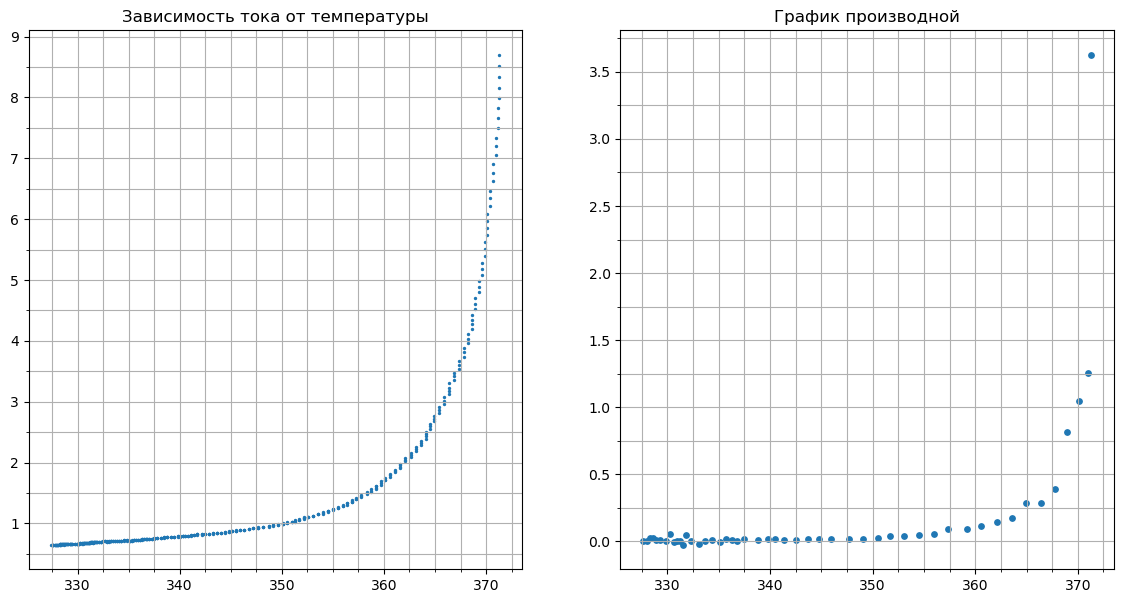

In [352]:
fig, (axs1, axs2) = plt.subplots(1, 2, figsize = (14, 7))

axs1.set_title("Зависимость тока от температуры")

axs1.scatter(tempr, tok, s = 2)

axs1.xaxis.set_minor_locator(MultipleLocator(2.5))
axs1.yaxis.set_minor_locator(MultipleLocator(0.5))

axs1.grid(True, which = 'major')
axs1.grid(True, which = 'minor')

number_of_dots = 10

tok_tempr_derivative = get_derivative(tempr, tok, number_of_dots)

axs2.set_title("График производной")
    
axs2.scatter(tempr[::number_of_dots], tok_tempr_derivative, s = 15)

axs2.xaxis.set_minor_locator(MultipleLocator(2.5))
axs2.yaxis.set_minor_locator(MultipleLocator(0.25))

axs2.grid(True, which = 'major')
axs2.grid(True, which = 'minor')
    
plt.show()

Из графика производная начинает резко увеличиваться при $T_{x} = 372.5\:К$

## Графики концентрации

<IPython.core.display.Math object>

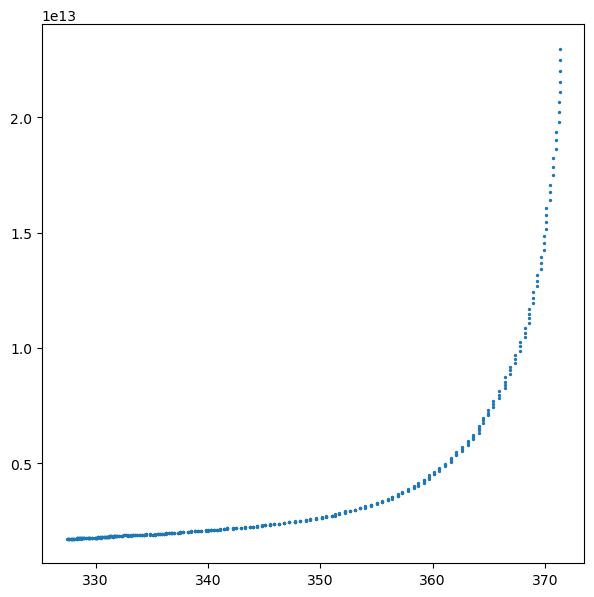

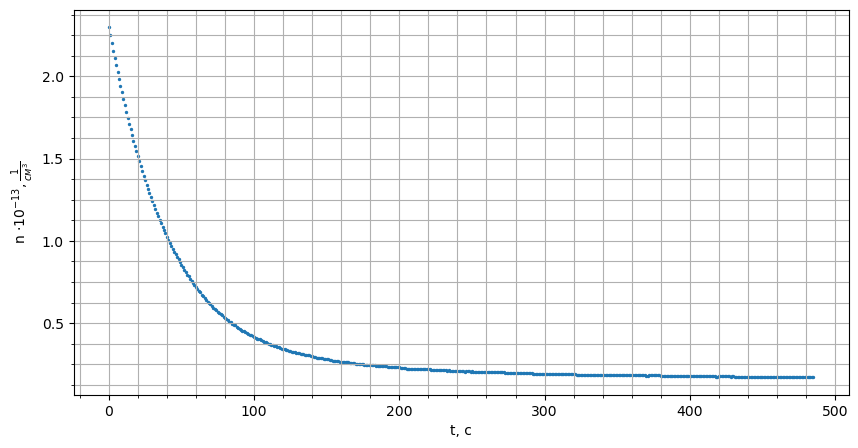

In [382]:
n0 = P0 / (k * T0) * 10 ** (-12) # 1/см^3

n = n0 * tok / I0

fig1, axs1 = plt.subplots(1, 1, figsize = (7, 7))
fig2, axs2 = plt.subplots(1, 1, figsize = (10, 5))

axs1.scatter(tempr, n, s = 2)
axs2.scatter(time, n / 10 ** 13, s = 2)

axs2.xaxis.set_minor_locator(MultipleLocator(20))
axs2.yaxis.set_minor_locator(MultipleLocator(0.125))

axs2.grid(True, which = 'major')
axs2.grid(True, which = 'minor')

axs2.set_xlabel('t, c')
axs2.set_ylabel('n $\\cdot 10^{-13}, \\frac{1}{см^3}$')


display(Math(f'$n = {n[-20] / 10**13} \cdot 10^{{13}}$'))

fig2.savefig('../Отчет/images/concentrate_by_time.png')

plt.show()

## Геометрические характеристики лампы

In [354]:
S = 23.6
V = np.pi * 3.4 * 3.4 * 26.5 / 4 # Габаритные размеры: Ø34х265 мм

w = 16.2 * 10 ** (-16) # 16,2* 10^(-16) см^2

In [355]:
Ns = S / w
print(Ns)
N0 = V * n0

1.4567901234567904e+16


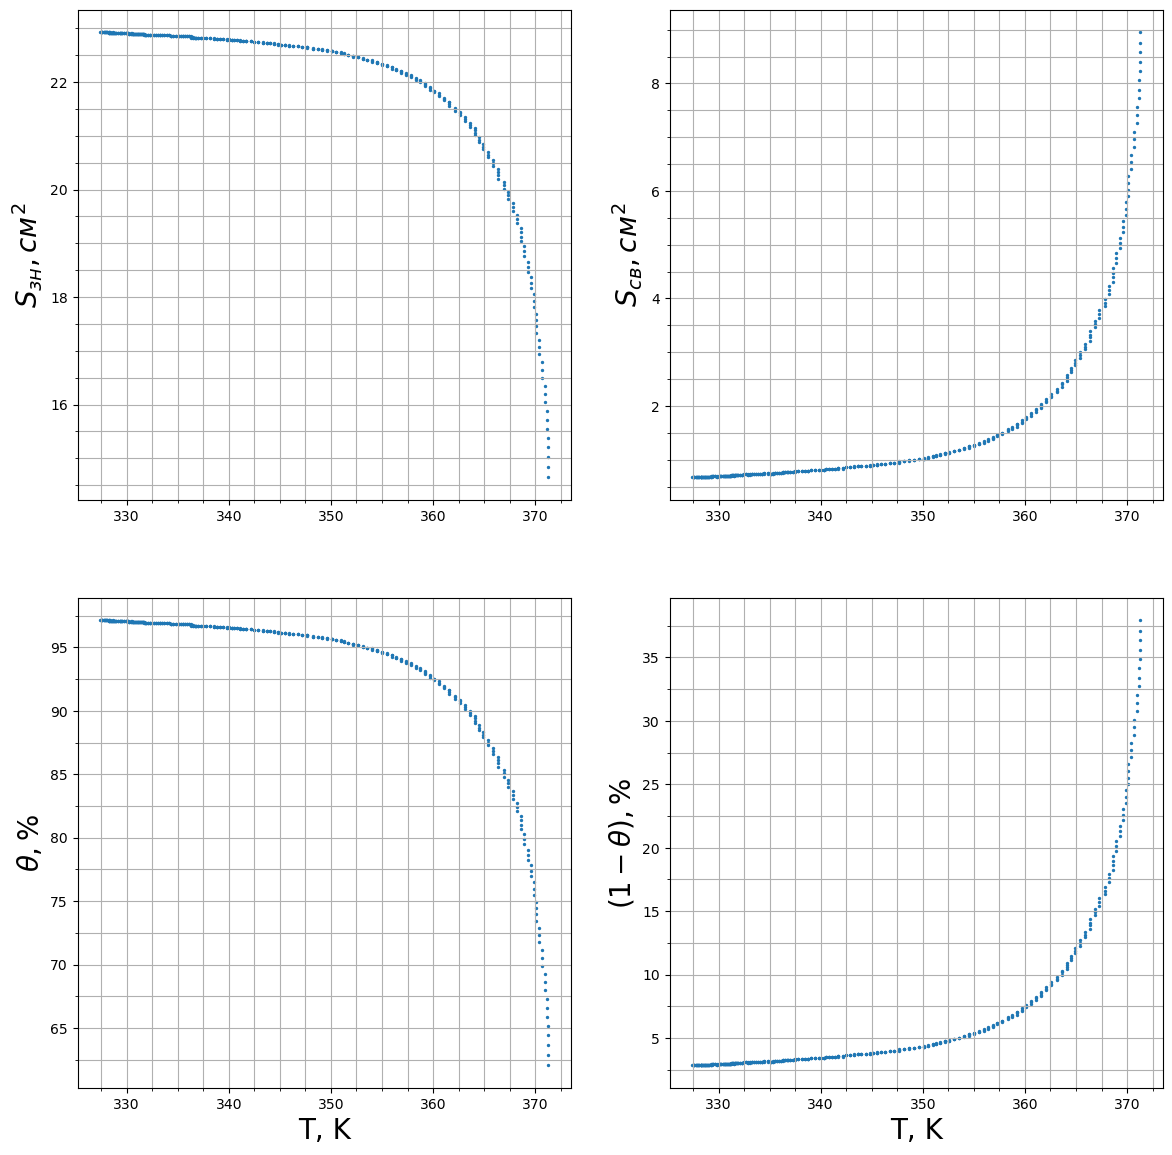

In [356]:
S_occ = (Ns - n * V) * w # occupied square (занятая площадь)

fig, ((axs1, axs2), (axs3, axs4)) = plt.subplots(2, 2, figsize = (14, 14))

axs1.scatter(tempr, S_occ, s = 2)

axs1.xaxis.set_minor_locator(MultipleLocator(2.5))
axs1.yaxis.set_minor_locator(MultipleLocator(0.5))
axs1.grid(True, which = 'major')
axs1.grid(True, which = "minor")

axs1.set_ylabel('$S_{зн}, см^2$', fontsize = 20)

axs2.scatter(tempr, S - S_occ, s = 2)

axs2.xaxis.set_minor_locator(MultipleLocator(2.5))
axs2.yaxis.set_minor_locator(MultipleLocator(0.5))

axs2.grid(True, which = 'major')
axs2.grid(True, which = "minor")

axs2.set_ylabel('$S_{св}, см^2$', fontsize = 20)

axs3.scatter(tempr, S_occ / S * 100, s = 2)

axs3.xaxis.set_minor_locator(MultipleLocator(2.5))
axs3.yaxis.set_minor_locator(MultipleLocator(2.5))
axs3.grid(True, which = 'major')
axs3.grid(True, which = "minor")
axs3.set_xlabel('T, K', fontsize = 20)
axs3.set_ylabel('$\\theta, \\%$', fontsize = 20)

axs4.scatter(tempr, (S - S_occ) / S * 100, s = 2)

axs4.xaxis.set_minor_locator(MultipleLocator(2.5))
axs4.yaxis.set_minor_locator(MultipleLocator(2.5))

axs4.grid(True, which = 'major')
axs4.grid(True, which = "minor")
axs4.set_xlabel('T, K', fontsize = 20)
axs4.set_ylabel('$(1 - \\theta), \\%$', fontsize = 20)

fig.savefig('../Отчет/images/squares.png')

plt.show()

In [357]:
S_occ_derivative = get_derivative(tempr, S_occ, 5)

fig, ((axs1), (axs3)) = plt.subplots(2, 1, figsize = (7, 14))

axs1.scatter(tempr[::5], S_occ_derivative, s = 10)

axs1.xaxis.set_minor_locator(MultipleLocator(2.5))
axs1.yaxis.set_minor_locator(MultipleLocator(0.5))
axs1.grid(True, which = 'major')
axs1.grid(True, which = "minor")

axs1.set_ylabel('$S_{зн}, см^2$', fontsize = 20)

axs3.scatter(tempr[::5], S_occ_derivative / S * 100, s = 10)

axs3.xaxis.set_minor_locator(MultipleLocator(2.5))
axs3.yaxis.set_minor_locator(MultipleLocator(2.5))
axs3.grid(True, which = 'major')
axs3.grid(True, which = "minor")
axs3.set_xlabel('T, K', fontsize = 20)
axs3.set_ylabel('$\\theta, \\%$', fontsize = 20)

plt.show()

ValueError: Cannot calculate a linear regression if all x values are identical

## Скорость откачки

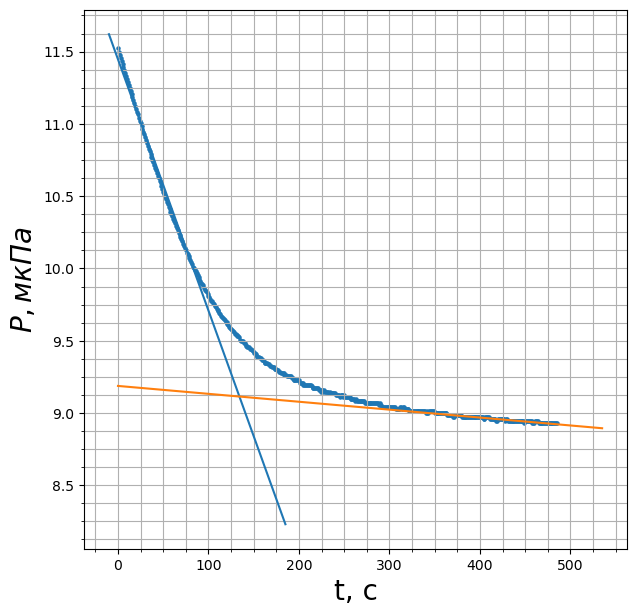

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [367]:
fig, axs1 = plt.subplots(1, 1, figsize = (7, 7))

P = P0 * tok / I0

axs1.scatter(time, np.log(P), s = 5)
axs1.xaxis.set_minor_locator(MultipleLocator(25))
axs1.yaxis.set_minor_locator(MultipleLocator(0.125))
axs1.grid(True, which = 'major')
axs1.grid(True, which = 'minor')

axs1.set_xlabel('t, c', fontsize = 20)
axs1.set_ylabel('$P, мкПа$',fontsize = 20)

length = 100

slope, intercept, *_ = linregress(time[0:length], np.log(P)[0:length])

W_first = -slope * V

x = np.linspace(min(time) - 10, max(time) - 300, 1000)

axs1.plot(x, slope * x + intercept)

length = 600
first = time.size - length - 1

slope, intercept, *_ = linregress(time[first:first+length], np.log(P)[first:first+length])

W_last = -slope * V

x = np.linspace(min(time), max(time) + 50, 1000)

axs1.plot(x, slope * x + intercept)

plt.show()

display(Math(f'W_{{нч}} = {W_first:.3f} \\: \\frac{{см^3}}{{c}}'))
display(Math(f'\\tau_{{нч}} = {V/W_first/60:.1f} \\: мин'))
display(Math(f'$W_{{кн}} = {W_last:.3f} \\: \\frac{{см^3}}{{c}}$'))
display(Math(f'\\tau_{{нч}} = {V/W_last/60:.1f} \\: мин'))

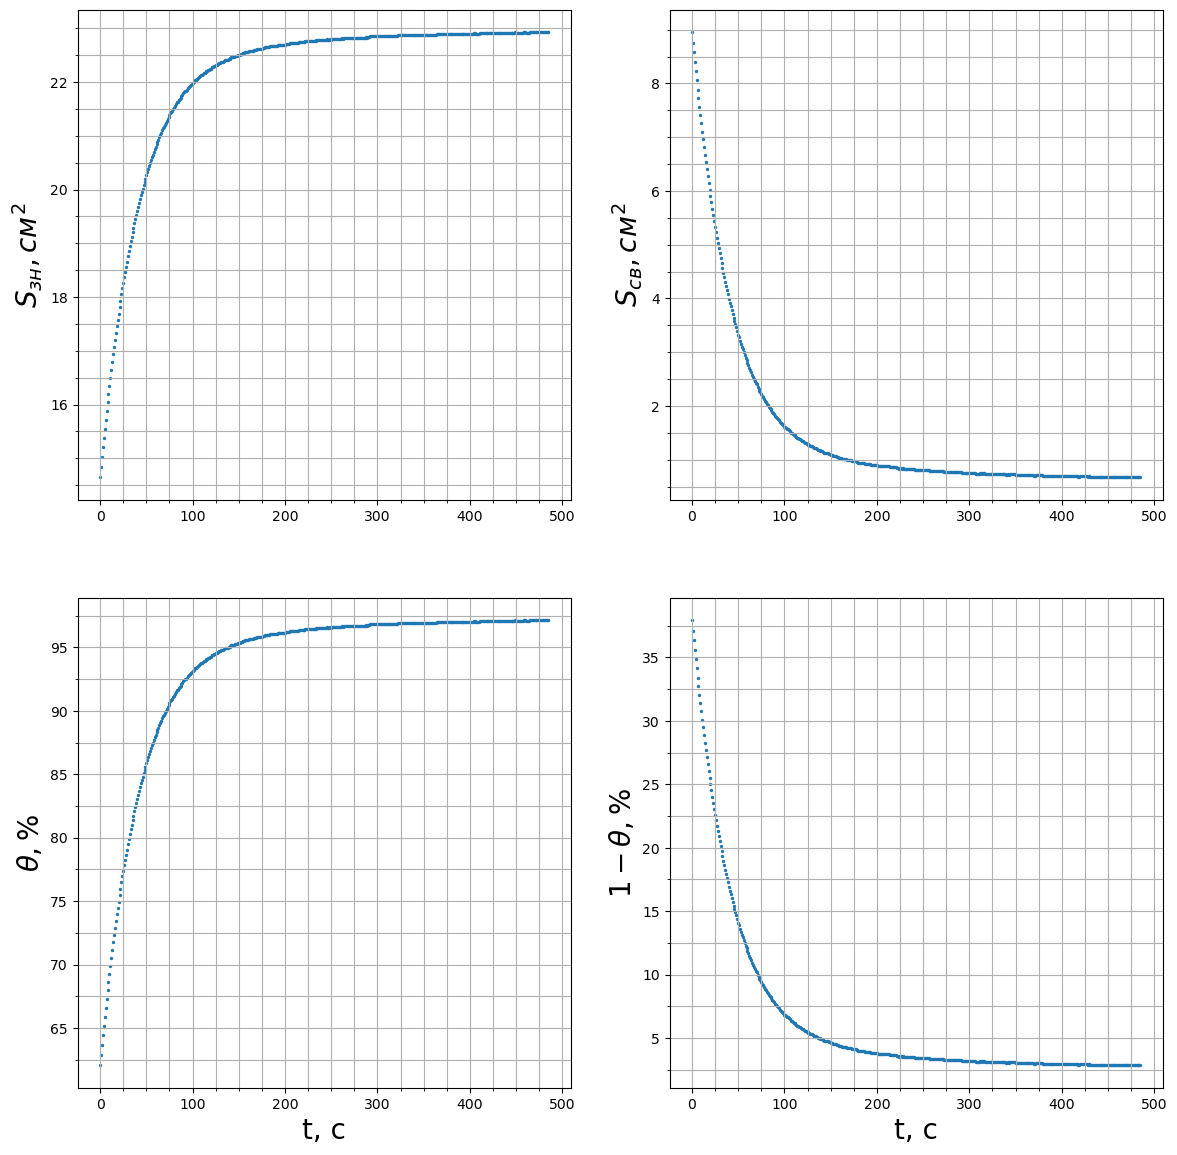

In [368]:
fig, ((axs1, axs2), (axs3, axs4)) = plt.subplots(2, 2, figsize = (14, 14))

axs1.scatter(time, S_occ, s = 2)

axs1.xaxis.set_minor_locator(MultipleLocator(25))
axs1.yaxis.set_minor_locator(MultipleLocator(0.5))
axs1.grid(True, which = 'major')
axs1.grid(True, which = "minor")

axs1.set_ylabel('$S_{зн}, см^2$', fontsize = 20)

axs2.scatter(time, S - S_occ, s = 2)

axs2.xaxis.set_minor_locator(MultipleLocator(25))
axs2.yaxis.set_minor_locator(MultipleLocator(0.5))

axs2.grid(True, which = 'major')
axs2.grid(True, which = "minor")

axs2.set_ylabel('$S_{св}, см^2$', fontsize = 20)

axs3.scatter(time, S_occ / S * 100, s = 2)

axs3.xaxis.set_minor_locator(MultipleLocator(25))
axs3.yaxis.set_minor_locator(MultipleLocator(2.5))
axs3.grid(True, which = 'major')
axs3.grid(True, which = "minor")
axs3.set_xlabel('t, c', fontsize = 20)
axs3.set_ylabel('$\\theta, \\%$', fontsize = 20)

axs4.scatter(time, (S - S_occ) / S * 100, s = 2)

axs4.xaxis.set_minor_locator(MultipleLocator(25))
axs4.yaxis.set_minor_locator(MultipleLocator(2.5))

axs4.grid(True, which = 'major')
axs4.grid(True, which = "minor")
axs4.set_xlabel('t, c', fontsize = 20)
axs4.set_ylabel('$ 1-\\theta, \\%$', fontsize = 20)

plt.show()

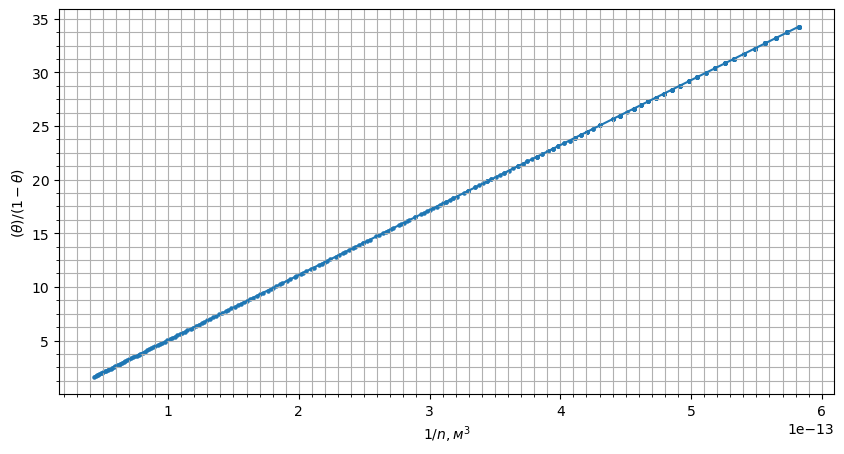

In [378]:
lengmure = S_occ / (S - S_occ)

fig, axs = plt.subplots(figsize = (10, 5))

count_of_dots = 40

slope, intercept, *_ = linregress(1/n, lengmure)

x = np.linspace(min(1/n), max(1/n), 20)

axs.scatter(1/n, lengmure, s = 5)

axs.plot(x, slope * x + intercept)

axs.xaxis.set_minor_locator(MultipleLocator(0.1 * 10**(-13)))
axs.set_xlabel('$1/n, м^3$')
axs.yaxis.set_minor_locator(MultipleLocator(1.25))
axs.set_ylabel('$(\\theta)/(1 - \\theta)$')

axs.grid(True, which = 'major')
axs.grid(True, which = 'minor')

fig.savefig('../Отчет/images/lengmure_koef.png')

plt.show()